In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [9]:
lr_model.score(X_test,y_test)

0.725

#We use Normalization to Scale up our data
MinMax Scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
df_normalized=pd.DataFrame(X_train_scaled)
df1_normalized=pd.DataFrame(X_test_scaled)

In [13]:
df_normalized

,0,1
0,0.952381,0.955556
1,0.976190,0.503704
2,0.142857,0.296296
3,0.190476,0.148148
4,0.952381,0.170370
...,...,...
315,0.714286,0.111111
316,0.261905,0.207407
317,0.428571,0.274074
318,0.214286,0.288889


In [14]:
df1_normalized

,0,1
0,0.285714,0.533333
1,0.476190,0.259259
2,0.404762,0.444444
3,0.285714,0.474074
4,0.404762,0.259259
...,...,...
75,0.000000,0.496296
76,0.571429,0.474074
77,0.523810,0.333333
78,0.833333,0.140741


In [15]:
#Lets do Logistic Regression on scaled data test
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [17]:
model.score(X_test_scaled, y_test)

0.925

We can see the accuracy is increased

In [20]:
y_train_pred=model.predict(X_train_scaled)
y_test_pred=model.predict(X_test_scaled)

In [31]:
df2=pd.DataFrame(y_train_pred,y_train)

In [30]:
df2=pd.DataFrame(y_test_pred,y_test)

In [33]:
# Lower the MSE, the closer is forecast to actual.
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_test_pred)
print(mse)
mse=mean_squared_error(y_train,y_train_pred)
print(mse)

0.075
0.203125


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [35]:
cm = confusion_matrix(y_test,y_test_pred)

In [36]:
cm

array([[58,  0],
       [ 6, 16]])

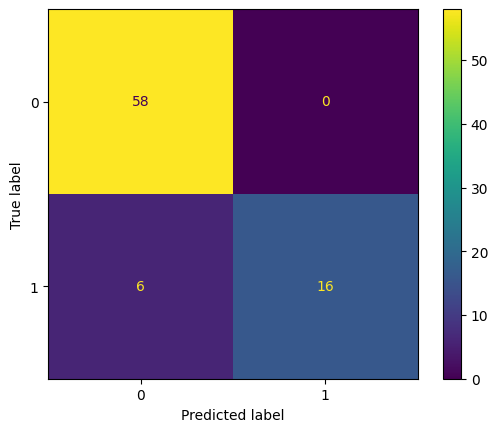

In [37]:
ConfusionMatrixDisplay(cm).plot()

In [38]:
tp=cm[0,0]
tn=cm[1,1]
fp=cm[0,1]
fn=cm[1,0]

In [39]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [41]:
acc = accuracy_score(y_test,y_test_pred)
acc

0.925

In [42]:
err = 1 - acc
err

0.07499999999999996

In [43]:
from sklearn.metrics import precision_score

prec = precision_score(y_test,y_test_pred)
prec

1.0

In [44]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_test_pred)
rec

0.7272727272727273